In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Loading the dataset
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [3]:
#get features (X) and class (y) from the dataset 
X = df.data
y = df.target

#intialize a dictionary to capture execution time and accuracy for various models
models_info = {}

Load the dataset and split it into a training set (70%) and a test set (30%).

In [4]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

Train <b>Logistic Regression</b> on the dataset and time how long it takes. Look up how to compute execution time of Python code.

In [5]:
start_time = time.time()

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj= LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

execTimeLR = time.time() - start_time
print("--- execution time in %s seconds ---" % execTimeLR)

--- execution time in 0.24829888343811035 seconds ---


Evaluate the resulting model on the test set.

In [6]:
#Making predictions on the Test Set
y_pred= classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

lrScore = classifierObj.score(X_test,y_test)

models_info["Logistic Regression"] = lrScore *100, execTimeLR

Next, use <b>PCA</b> to reduce the dataset’s dimensionality, with an explained variance ratio of at least 95%.

In [7]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj= PCA(n_components=None)
X_train_pca = pcaObj.fit_transform(X_train)
X_test_pca = pcaObj.transform(X_test)
components_variance= pcaObj.explained_variance_ratio_

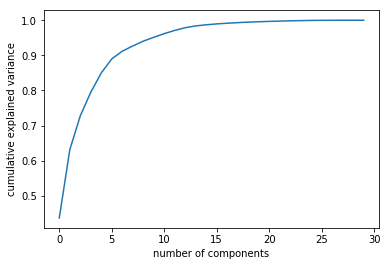

In [8]:
plt.plot(np.cumsum(pcaObj.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
cumsum = 0
print('{:<20} {:<16} {:<16}'.format("Principal Component", "%Variance", "%Cummulative"))
for i in range(0,30):
    cumsum = cumsum + components_variance[i]
    print('{:<20} {:<16.2f} {:<16.2f}'.format(i+1, components_variance[i]*100, cumsum*100))
    if (cumsum > 0.95):
        break

Principal Component  %Variance        %Cummulative    
1                    43.69            43.69           
2                    19.42            63.10           
3                    9.66             72.77           
4                    6.72             79.48           
5                    5.50             84.98           
6                    4.01             88.99           
7                    2.18             91.18           
8                    1.49             92.67           
9                    1.37             94.04           
10                   1.10             95.14           


In [11]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj= PCA(n_components = i+1 )
X_train_pca = pcaObj.fit_transform(X_train)
X_test_pca = pcaObj.transform(X_test)
components_variance= pcaObj.explained_variance_ratio_

Train a new Logistic Regression classifier on the PCA reduced dataset and see how long it takes. Was training much faster?

In [12]:
start_time = time.time()

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj= LogisticRegression(random_state=0)
classifierObj.fit(X_train_pca, y_train)

execTimePCA = time.time() - start_time
print("--- execution time in %s seconds ---" % execTimePCA)
print("--- execution time difference in %s seconds ---" % (execTimeLR - execTimePCA))

--- execution time in 0.0021820068359375 seconds ---
--- execution time difference in 0.24611687660217285 seconds ---


Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [13]:
#Making predictions on the Test Set
y_pred_pca= classifierObj.predict(X_test_pca)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

pcaScore = classifierObj.score(X_test_pca,y_test)

models_info["PCA"] = pcaScore * 100, execTimePCA

Use <b>LDA</b> to reduce the dataset’s dimensionality down to 1 linear discriminant.

In [14]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=1)
X_train_lda = ldaObj.fit_transform(X_train,y_train)
X_test_lda = ldaObj.transform(X_test)

Train a new Logistic Regression classifier on the LDA reduced dataset and see how long it takes.

In [15]:
start_time = time.time()

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj= LogisticRegression(random_state=0)
classifierObj.fit(X_train_lda, y_train)

execTimeLDA = time.time() - start_time
print("--- execution time in %s seconds ---" % execTimeLDA)

--- execution time in 0.0008959770202636719 seconds ---


Evaluate the classifier on the test set.

In [16]:
#Making predictions on the Test Set
y_pred_lda = classifierObj.predict(X_test_lda)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lda = confusion_matrix(y_test, y_pred_lda)

ldaScore = classifierObj.score(X_test_lda,y_test)

models_info["LDA"] = ldaScore * 100, execTimeLDA

Use <b>Kernel PCA</b> to reduce the dataset’s dimensionality down to 2 features.

In [17]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kernelPCAObj.fit_transform(X_train)
X_test_kpca = kernelPCAObj.transform(X_test)

Train a new Logistic Regression classifier on the Kernel PCA reduced dataset and see how long it takes.

In [18]:
start_time = time.time()

#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_kpca, y_train)

execTimeKPCA = time.time() - start_time
print("--- execution time in %s seconds ---" % execTimeKPCA)

--- execution time in 0.0010459423065185547 seconds ---


Evaluate the classifier on the test set.

In [19]:
#Making predictions on the Test Set
y_pred_kpca = classifierObj.predict(X_test_kpca)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_kpca = confusion_matrix(y_test, y_pred_kpca)

kpcaScore = classifierObj.score(X_test_kpca, y_test)

In [20]:
models_info["KPCA"] = kpcaScore * 100, execTimeKPCA

<b>Models performance summary</b>

In [21]:
print('{:<20} {:<12} {:<12}'.format("Model", "Accuracy", "Execution Time"))
for model, info in models_info.items():
    print('{:<20} {:<12.4f} {:<12.4f}'.format(model, info[0], info[1]))

Model                Accuracy     Execution Time
Logistic Regression  97.6608      0.2483      
PCA                  95.9064      0.0022      
LDA                  96.4912      0.0009      
KPCA                 90.0585      0.0010      
